<a href="https://colab.research.google.com/github/HeadHunter28/DeepLearning/blob/main/Digit%20Recognition%20using%20NN/Digit_Recogniton_SKLrn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digit Recognition from images using Neural Network



---



Link to dataset :

About the dataset :



---



- Importing necessary libraries

In [47]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report


- Loading the dataset :

In [48]:
digits = pd.read_csv("digits.csv")

- Peeking at the dataset :

In [49]:
digits.head(4)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
digits.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

In [ ]:
digits.shape

(42000, 785)

- We have 42000 rows - each row corresponds to an image, with each having 784 pixels.

- An image having 784 pixels implies it is 28*28 pixels in dimension.

- The column 'label' is the target feature. We will extract it.

In [50]:
labeldata = digits['label']

- Excluding the 'label' feature, we will convert the rest of the dataset, which are just the pixels, into a numpy array.

In [51]:
digitvalues = np.array(digits.drop('label',axis=1)).astype('float')

---



From the pixel values, let us display 5 random images as examples :

1. Making a figure of size (12,4)

2. Iterating 5 times - Making a subplot and displaying a random image each time

Each image in the array is of dimensions (781,1), which is reshaped to (28,28)

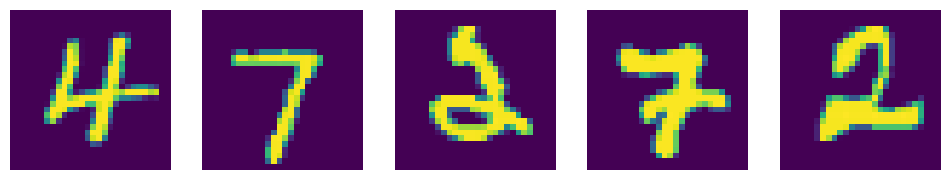

In [52]:
plt.figure(figsize=(12,4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(random.choice(digitvalues).reshape(28,28))
    plt.axis("off")

---

### Splitting the data to training and testing sets :


In [53]:
split = 0.8, 0.2  #80/20 split

In [54]:
# normalize data
digits /= 255.0

split_ind = int(len(digitvalues)*split[0])

X_train, X_test, y_train, y_test = digitvalues[:split_ind], digitvalues[split_ind:], labeldata[:split_ind], labeldata[split_ind:]

X_train.shape, X_test.shape


((33600, 784), (8400, 784))

----

### Making the neural network :

1. A neural network or multi layered perceptron in Scikitlearn can be instantiated by the MLPClassifer class

<br>
2. An instance of MLPClassifer has the following parameters : <br><br>

- <b> hidden_layer_sizes </b>: tuple, length = n_layers - 2, default=(100,). The ith element represents the number of neurons in the ith hidden layer.

- <b> alpha </b>: float, default=0.0001. Strength of the L2 regularization term. The L2 regularization term is divided by the sample size when added to the loss.

- <b> max_iter </b>: int, default=200. Maximum number of iterations. The solver iterates until convergence (determined by ‘tol’) or this number of iterations. For stochastic solvers (‘sgd’, ‘adam’), note that this determines the number of epochs (how many times each data point will be used), not the number of gradient steps.

- <b> learning_rate_init </b>: float, default=0.001. The initial learning rate used. It controls the step-size in updating the weights. Only used when solver=’sgd’ or ‘adam’.

<br>

3. Measure the accuracy of the neural network model with default parameters.
<br>


4. To optimise the parameters, apply <b> Randomized search cross validation </b> where a fixed number of parameter settings is sampled from the specified distributions, as well as <b> Grid Search cross validation </b> which runs all iterations of the model testing with every combination of parameters.

<br>

5. Find the accuracy of models.


---

---

### Multilayer perceptron with default parameters :

In [55]:
# Instantiating and training
mlp_model = MLPClassifier().fit(X_train, y_train)

# Generating predictions

y_pred = mlp_model.predict(X_test)

print(f"Using MLPClassifier with the default parameter values gives an accuracy of {accuracy_score(y_pred, y_test)}")

Using MLPClassifier with the default parameter values gives an accuracy of 0.9573809523809523


In [57]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       852
           1       0.98      0.98      0.98       953
           2       0.93      0.98      0.95       761
           3       0.95      0.95      0.95       889
           4       0.95      0.96      0.96       804
           5       0.93      0.96      0.95       725
           6       0.98      0.93      0.96       878
           7       0.98      0.97      0.97       890
           8       0.96      0.92      0.94       833
           9       0.93      0.96      0.94       815

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



----

### Implementing Randomized Search Cross Validation

- Defining parameters to test :

In [58]:
parameters = {'hidden_layer_sizes':[50, 100, 200],
              'alpha': [0.001, 0.01, 0.1],
              'max_iter': [200, 500, 800],
              'learning_rate_init':[0.0001, 0.001, 0.01, 0.1]}


-  With reduced training data size, apply randomized search cross validation :

In [59]:
model = MLPClassifier()

clf = RandomizedSearchCV(estimator=model, param_distributions=parameters, cv=5)

clf.fit(X_train[:3000], y_train[:3000]) # reduce the train set size to shorten the training time

RandomizedSearchCV(cv=5, estimator=MLPClassifier(),
                   param_distributions={'alpha': [0.001, 0.01, 0.1],
                                        'hidden_layer_sizes': [50, 100, 200],
                                        'learning_rate_init': [0.0001, 0.001,
                                                               0.01, 0.1],
                                        'max_iter': [200, 500, 800]})

- Find the best parameter values


In [60]:
print("The best parameter values found so far are:\n")
print(clf.best_params_)

The best parameter values found so far are:

{'max_iter': 200, 'learning_rate_init': 0.001, 'hidden_layer_sizes': 200, 'alpha': 0.1}


- Finding the best model and using it to make predictions :

In [61]:
best_model = clf.best_estimator_

In [62]:
best_preds = best_model.predict(X_test)
print(f"The accuracy score of the best model from Randomized search cross validation is {accuracy_score(y_test, best_preds)}\n")

The accuracy score of the best model from Randomized search cross validation is 0.8847619047619047



- By nature of the Randomized Search, the model with most optimal parameters gives lesser accuracy than the default model.

---

### Implementing Grid Search Cross Validation (with an even smaller training size for better execution time):

In [ ]:
clf1 = GridSearchCV(estimator=model, param_grid=parameters, cv=5, n_jobs=-1)
clf1.fit(X_train[:1500], y_train[:1500]) # may need to reduce the train set size to shorten the training time

print("The best parameter values found are:\n")
print(clf1.best_params_)

# store the best model found in "bestmodel"
bestmodel1 = clf1.best_estimator_

In [ ]:
y_pred1 = bestmodel1.predict(X_test)
print(f"The accuracy score of the best model from Grid Search cross validation is {accuracy_score(y_test, y_pred1)}\n")

Some outputs with predictions :

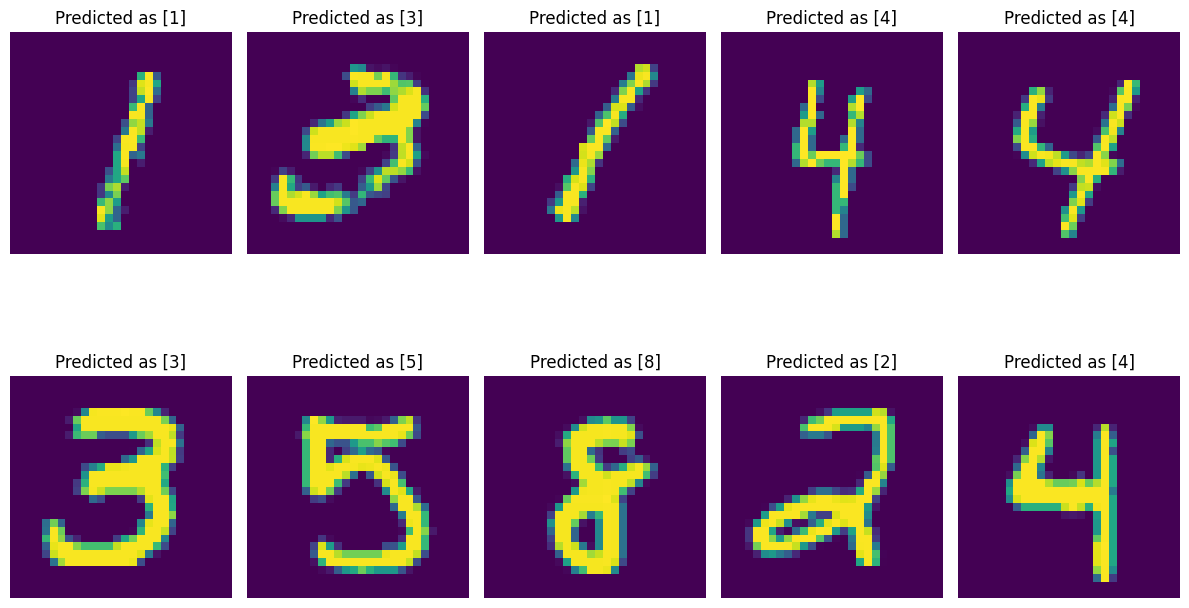

In [ ]:
plt.figure(figsize=(12,8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    sample = random.choice(X_test)
    plt.imshow(sample.reshape(28,28))
    pred = best_model.predict(sample.reshape(1,-1))
    plt.title(f"Predicted as {pred}")
    plt.axis("off")

plt.tight_layout()